In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("hi")

hi


In [4]:
# Load the dataset
df = pd.read_csv('/content/data (1).csv')

# Display the first few rows
print(df.head())


   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0


In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [7]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if applicable)
df = df.dropna()

print(df.columns)



footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64
Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')


In [8]:
features = ['footfall', 'temp Mode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']


In [11]:
# Check for column names
print(df.columns)

# Updated features list
features = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

# Feature Scaling
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

X = df[features]
y = df['fail']


Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')


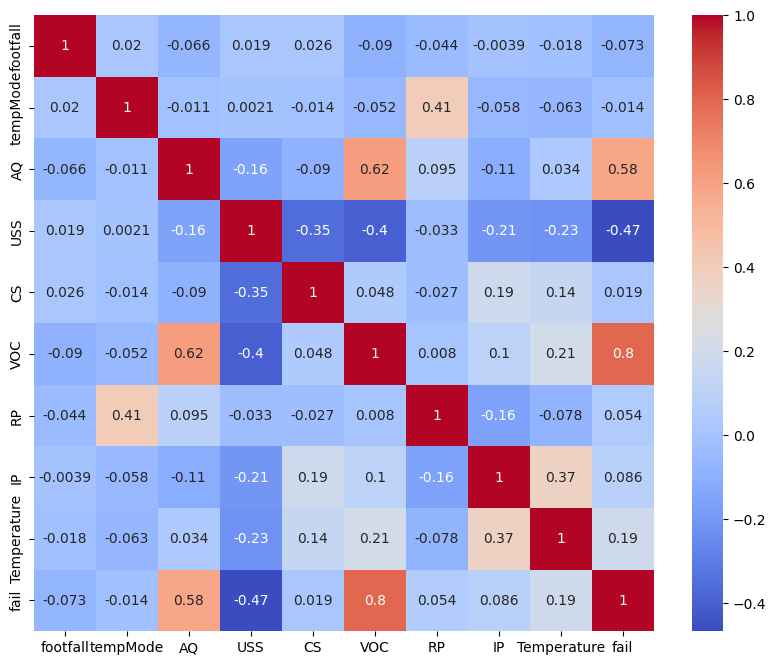

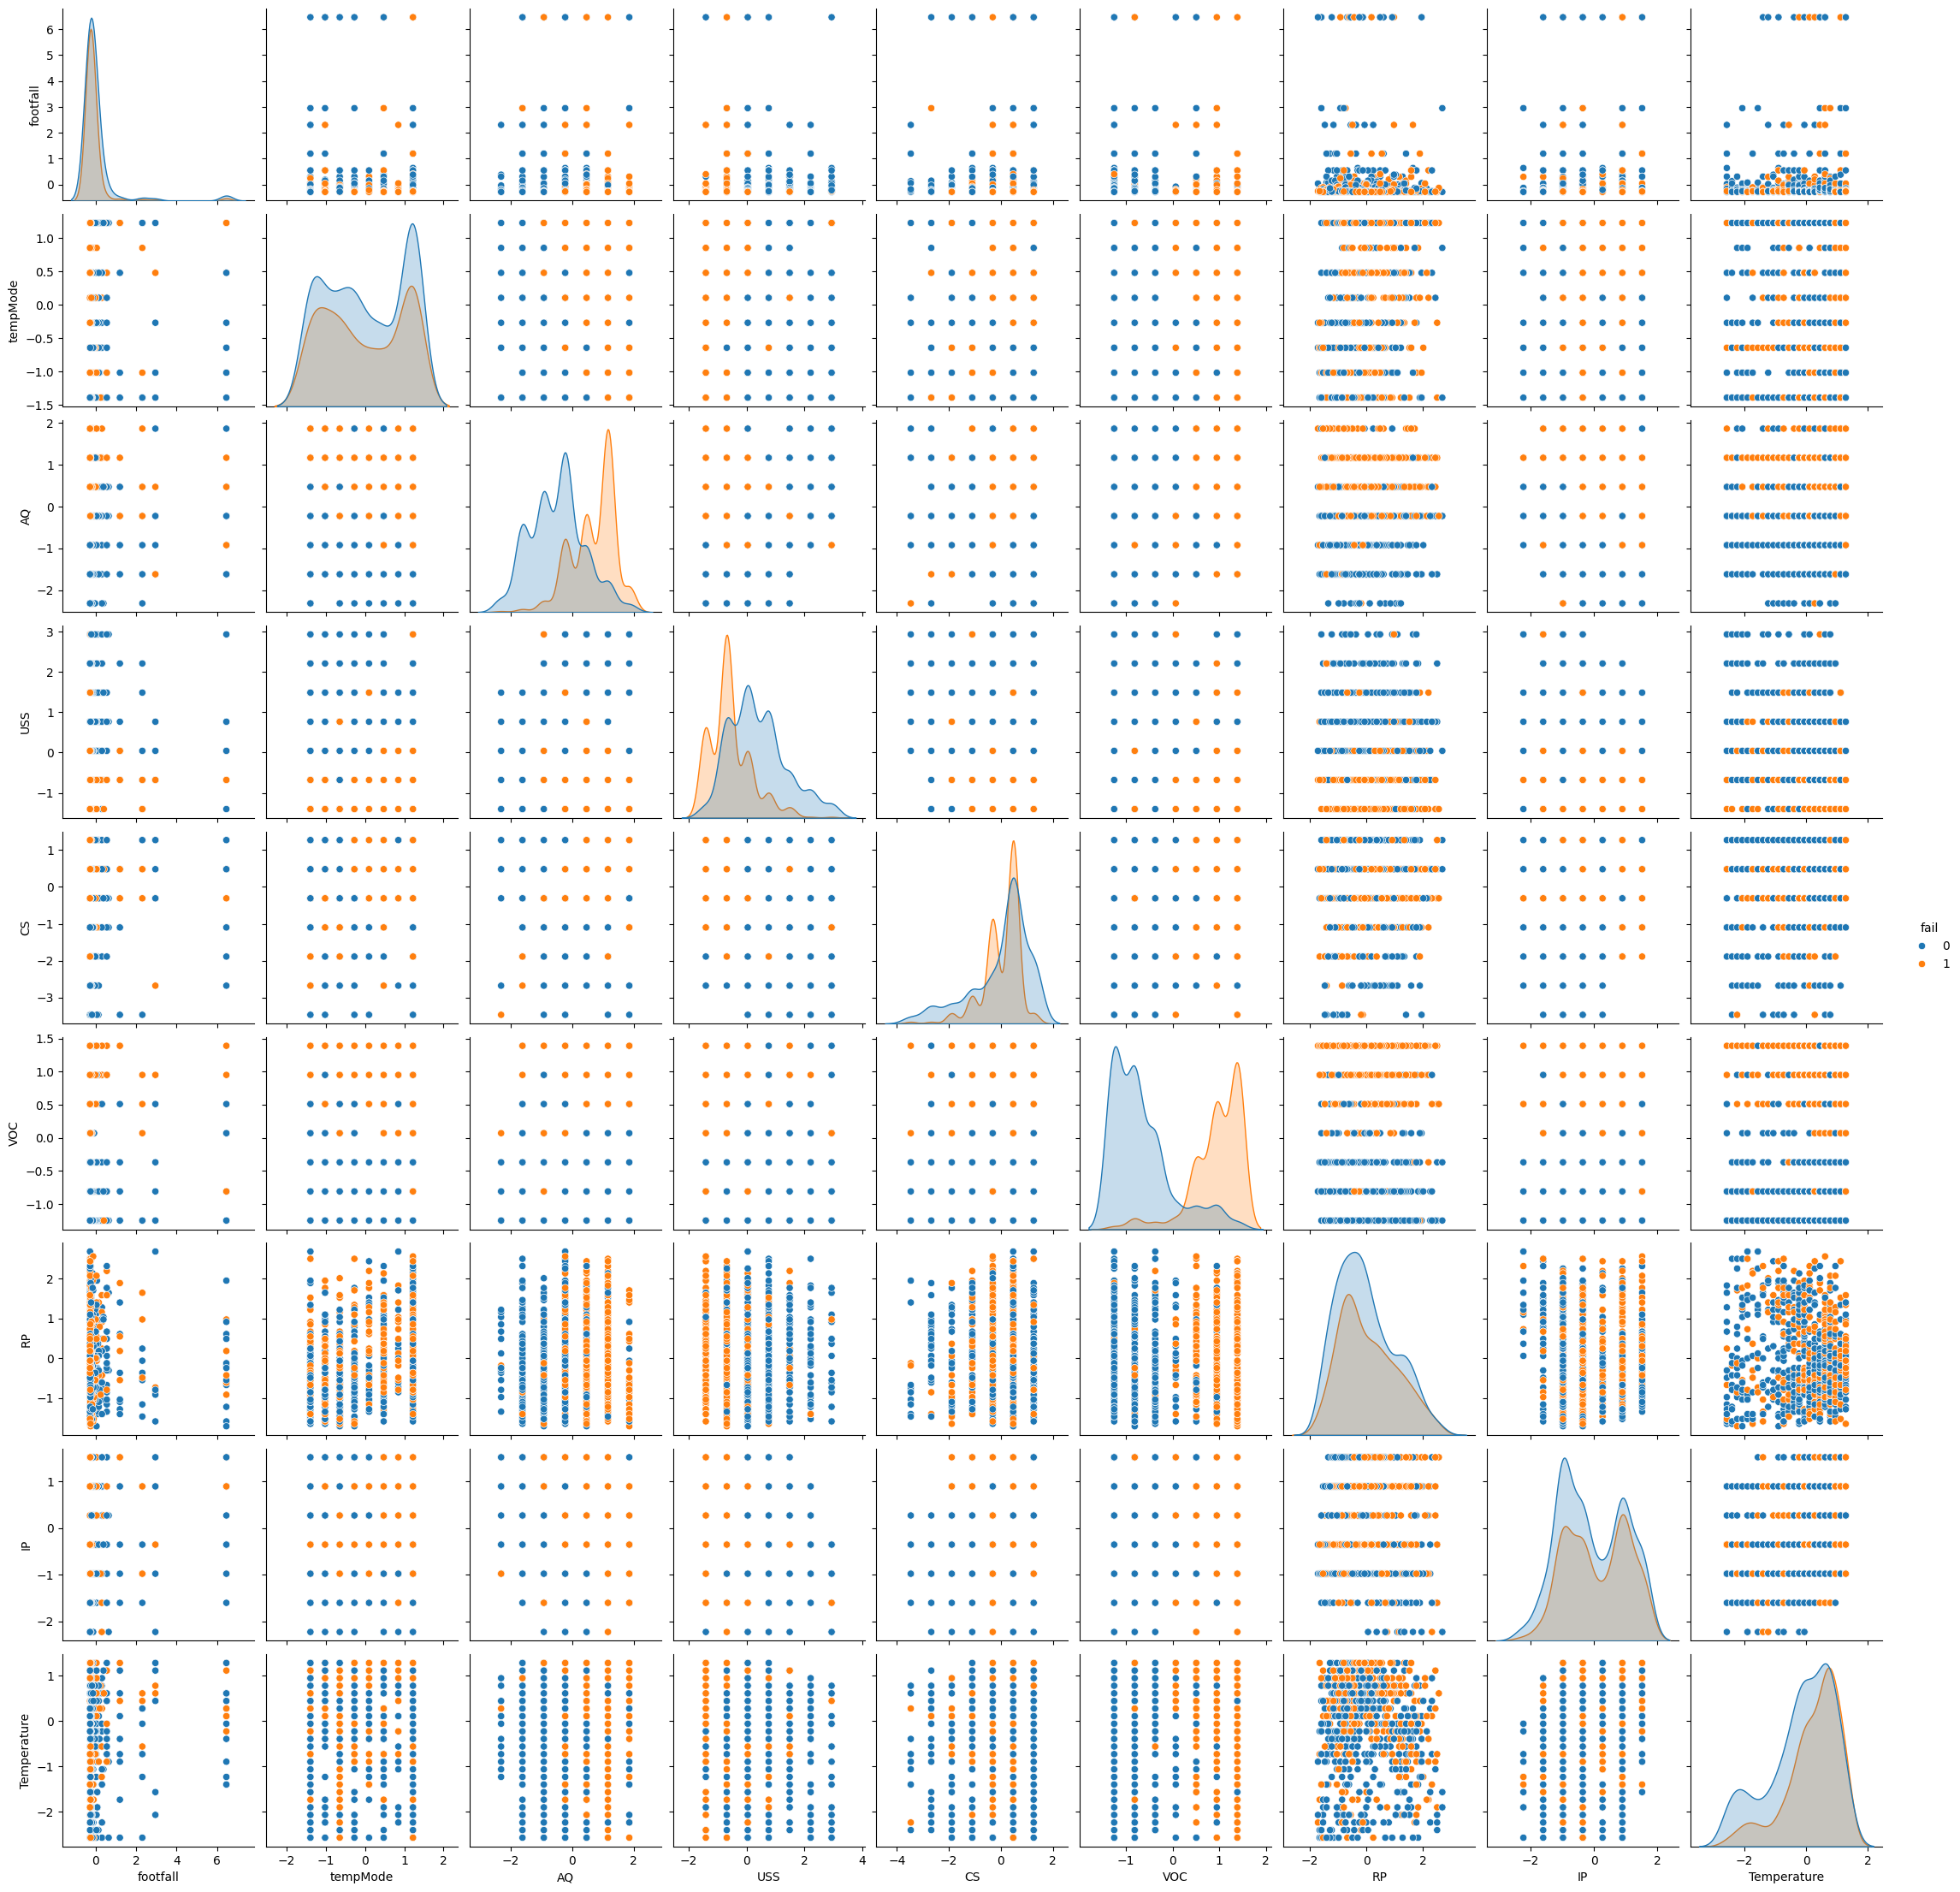

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot
sns.pairplot(df, hue='fail')
plt.show()


<ipython-input-14-46153b3b5698>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fail_count_by_footfall = df[df['fail'] == 1].groupby('footfall_range').size()


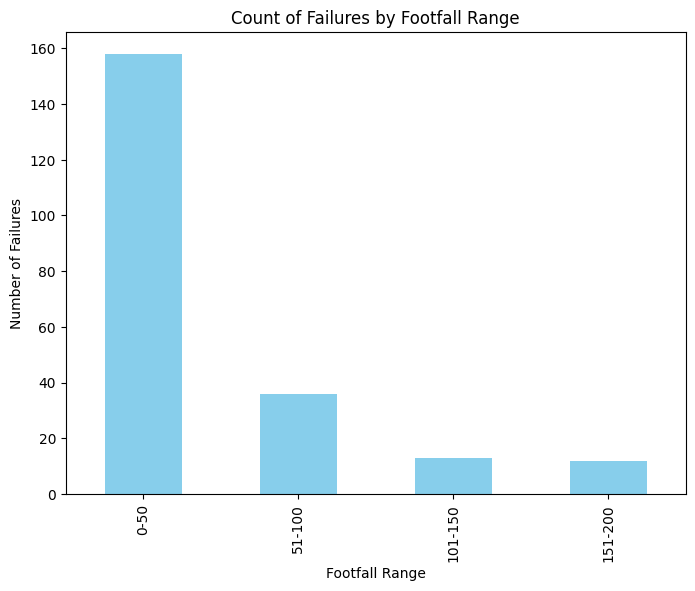

In [14]:


# Load the dataset
df = pd.read_csv('/content/data (1).csv')

# Create footfall ranges
df['footfall_range'] = pd.cut(df['footfall'], bins=[0, 50, 100, 150, 200], labels=['0-50', '51-100', '101-150', '151-200'])

# Count of failures by footfall range
fail_count_by_footfall = df[df['fail'] == 1].groupby('footfall_range').size()

# Bar Graph
plt.figure(figsize=(8, 6))
fail_count_by_footfall.plot(kind='bar', color='skyblue')
plt.title('Count of Failures by Footfall Range')
plt.xlabel('Footfall Range')
plt.ylabel('Number of Failures')
plt.show()


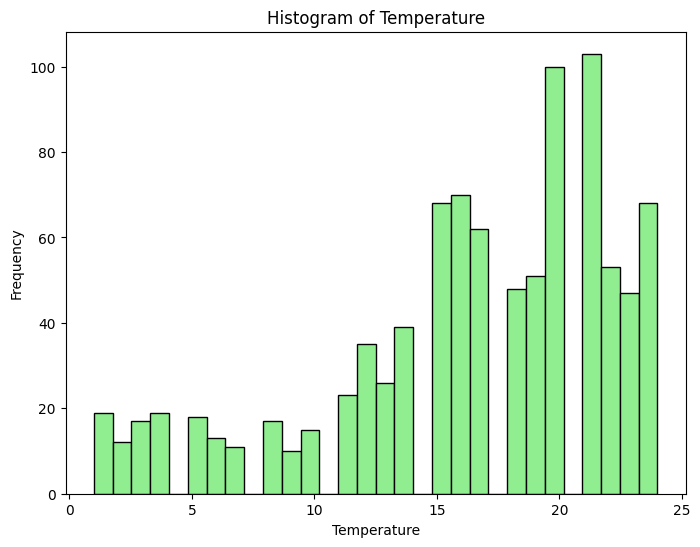

In [15]:
# Histogram of Temperature
plt.figure(figsize=(8, 6))
plt.hist(df['Temperature'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


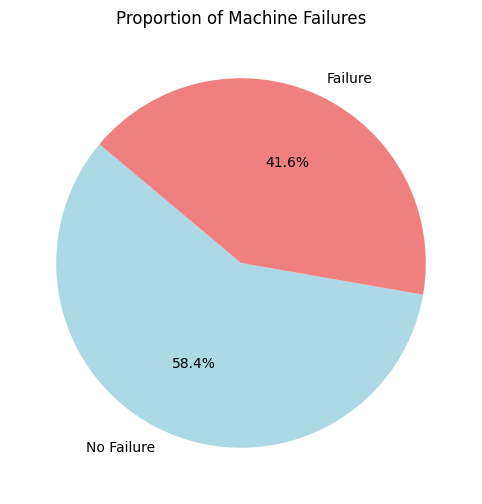

In [16]:
# Count of failures and non-failures
fail_counts = df['fail'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(fail_counts, labels=['No Failure', 'Failure'], colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Machine Failures')
plt.show()


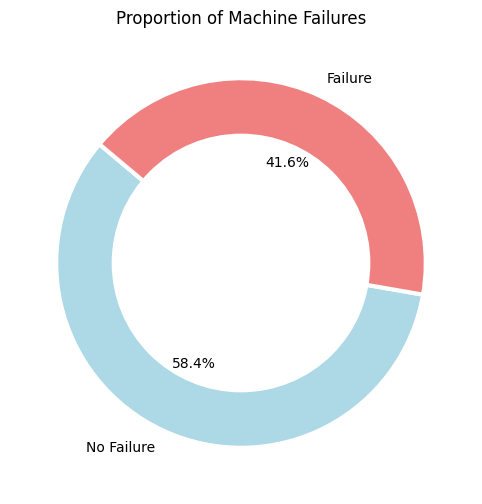

In [17]:
# Donut Chart
plt.figure(figsize=(8, 6))
plt.pie(fail_counts, labels=['No Failure', 'Failure'], colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
# Adding a circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proportion of Machine Failures')
plt.show()


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from xgboost import XGBClassifier
# Initialize the model
model = XGBClassifier(random_state=42)

# Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Train the model
best_model.fit(X_train, y_train)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       160
           1       0.86      0.87      0.87       124

    accuracy                           0.88       284
   macro avg       0.88      0.88      0.88       284
weighted avg       0.88      0.88      0.88       284



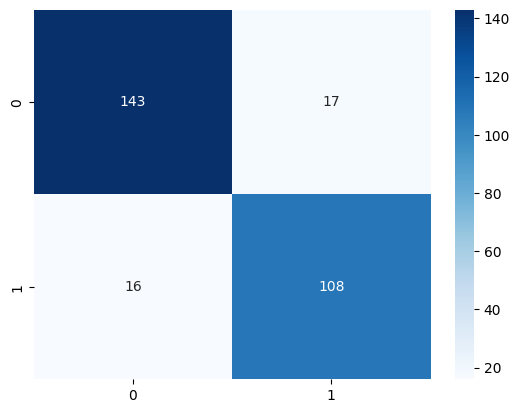

AUC-ROC Score: 0.9434979838709676


In [20]:
# Predictions
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {roc_auc}')


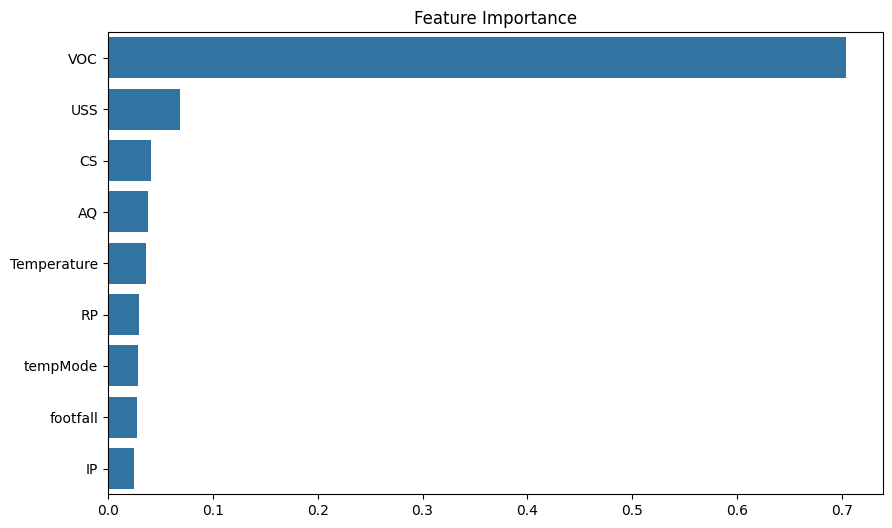

In [21]:
# Plot feature importance
importance = best_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importance[indices], y=[features[i] for i in indices])
plt.title('Feature Importance')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.88
